In [1]:
from modelo_lineal import ModeloLineal

In [55]:
data_path = './assets/proyecto_training_data.npy'
modelo = ModeloLineal(data_path, 0.80)

### Entrenamiento de modelo con variable OverallQual

#### Manual

In [56]:
vector_x, vector_y = modelo.get_trainning_arrays('OverallQual')
modelo.set_betas(-40000, 35500)

In [57]:
betas, error = modelo.entrar_modelo(vector_x, vector_y, 5000000, 1000000, 0.00000005)
betas[len(betas) - 1]

El error es de: 1223993888.7567453
El error es de: 1223671184.027982
El error es de: 1223349830.382391
El error es de: 1223029822.1633272
El error es de: 1222711153.737833


[-40588.96611183318, 36637.06455413747]

In [61]:
modelo.set_betas(-40588.96611183318, 36637.06455413747)

In [62]:
betas_m1, errores_m1 = modelo.entrar_modelo(vector_x, vector_y, 200000, 50000, 0.00005)
betas_m1[len(betas_m1) - 1]

El error es de: 1208368356.6840034
El error es de: 1196739461.3079844
El error es de: 1187311159.9840446
El error es de: 1179667023.290006


[-59737.020983123875, 39643.88456638599]

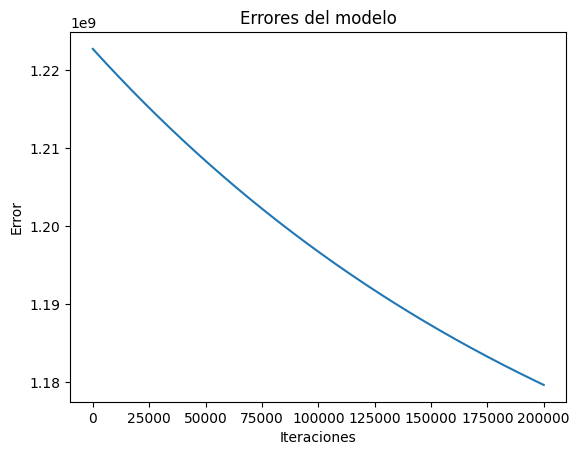

In [63]:
modelo.graficar_error(errores_m1)

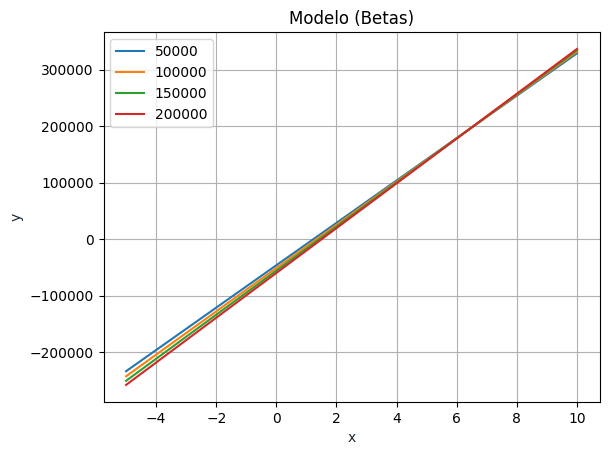

In [64]:
modelo.graficar_modelo(betas_m1, 50000)

#### ScikitLearn

In [65]:
vector_x, vector_y = modelo.get_trainning_arrays('OverallQual')
vector_x_test, vector_y_test = modelo.get_testing_arrays('OverallQual')

In [66]:
betas_scikit_m1, error_scikit_m1 = modelo.entrar_con_scikit(vector_x, vector_y, vector_x_test, vector_y_test)
print(f'betas_scikit_m1: {betas_scikit_m1}')
print(f'error_scikit_m1: {error_scikit_m1}')

betas_scikit_m1: [-96469.57131873941, 45411.99877915909]
error_scikit_m1: 0.6077497891131334


#### Estimacion entre Manual y ScikitLearn

In [67]:
# Estimacion
betas_manual_m1 = betas_m1[len(betas_m1) - 1]
betas_manual_m1 = betas_manual_m1[::-1]
betas_scikit_m1 = betas_scikit_m1[::-1]

In [68]:
muestra_x = modelo.get_muestra_x('OverallQual')
y_manual, y_scikit, y_promedio = modelo.estimar_modelos(betas_manual_m1, betas_scikit_m1, muestra_x)

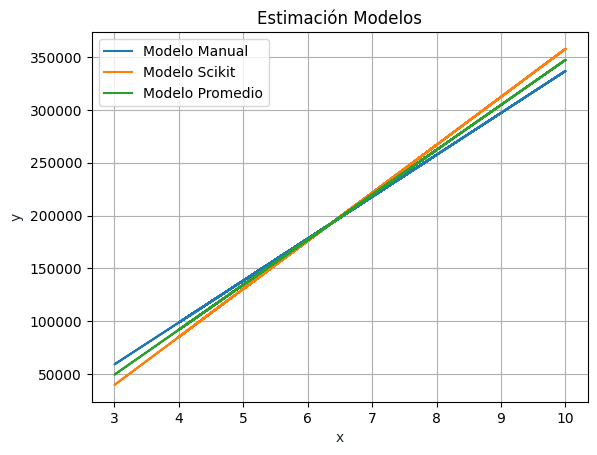

In [69]:
modelo.graficar_estimacion_modelos(muestra_x, y_manual, y_scikit, y_promedio)

### Entrenamiento de modelo con variable 1stFlrSF

### Manual

In [34]:
modelo = ModeloLineal(data_path, 0.80)
vector_x, vector_y = modelo.get_trainning_arrays('1stFlrSF')
modelo.set_betas(100, 2000)

In [35]:
betas_m2, errores_m2 = modelo.entrar_modelo(vector_x, vector_y, 2000000, 500000, 0.000000001)

El error es de: 1967803173.531807
El error es de: 1967799095.5939105
El error es de: 1967795018.0411875
El error es de: 1967790940.8736007


In [36]:
betas_m2[len(betas_m2) - 1]

[105.70685502692801, 153.6163156592261]

In [37]:
modelo.set_betas(153.6163156592261, 105.70685502692801)

In [38]:
betas_m2, errores_m2 = modelo.entrar_modelo(vector_x, vector_y, 5000000, 1000000, 0.000000001)
betas_m2[len(betas_m2) - 1]

El error es de: 1967646062.224282
El error es de: 1967637936.4114907
El error es de: 1967629812.1336398
El error es de: 1967621689.3904393
El error es de: 1967613568.1815991


[167.8623622640211, 153.5676403039177]

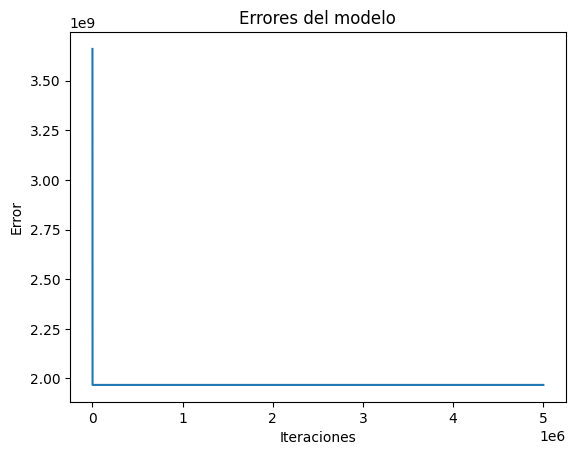

In [40]:
modelo.graficar_error(errores_m2)

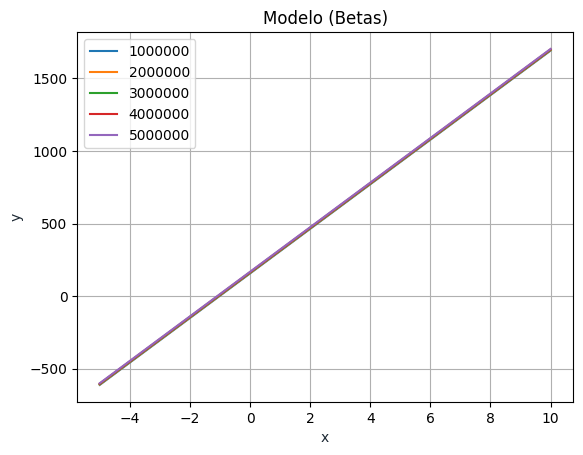

In [42]:
modelo.graficar_modelo(betas_m2, 1000000)

#### ScikitLearn

In [43]:
vector_x, vector_y = modelo.get_trainning_arrays('1stFlrSF')
vector_x_test, vector_y_test = modelo.get_testing_arrays('1stFlrSF')

In [44]:
betas_scikit_m2, error_scikit_m2 = modelo.entrar_con_scikit(vector_x, vector_y, vector_x_test, vector_y_test)
print(f'betas_scikit_m2: {betas_scikit_m2}')
print(f'error_scikit_m2: {error_scikit_m2}')

betas_scikit_m2: [30324.585174963722, 129.9512422871571]
error_scikit_m2: 0.3161393626594352


#### Estimacion entre manual y ScikitLearn

In [45]:
# Estimacion
betas_manual_m2 = betas_m2[len(betas_m2) - 1]
betas_manual_m2 = betas_manual_m2[::-1]
betas_scikit_m2 = betas_scikit_m2[::-1]

In [46]:
muestra_x = modelo.get_muestra_x('1stFlrSF')
y_manual, y_scikit, y_promedio = modelo.estimar_modelos(betas_manual_m2, betas_scikit_m2, muestra_x)

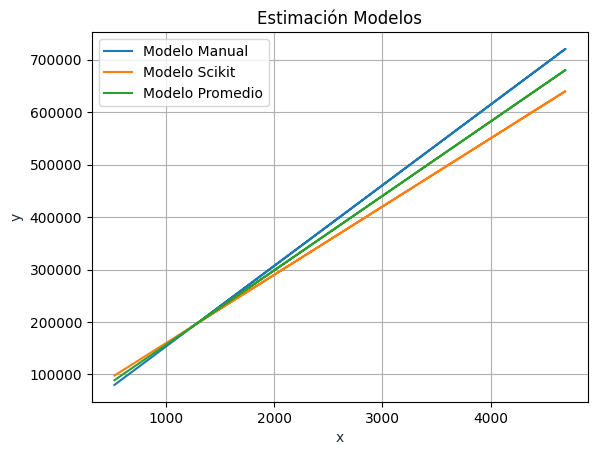

In [47]:
modelo.graficar_estimacion_modelos(muestra_x, y_manual, y_scikit, y_promedio)

### Evaluar modelos

#### Modelo OverallQual Manual vs Scikit

In [70]:
vector_x_test, vector_y_test = modelo.get_testing_arrays('OverallQual')

In [71]:
y_estimada, error_total, errores = modelo.estimar_modelo(vector_x_test, vector_y_test, betas_manual_m1)
error_total

1347229151.7202754

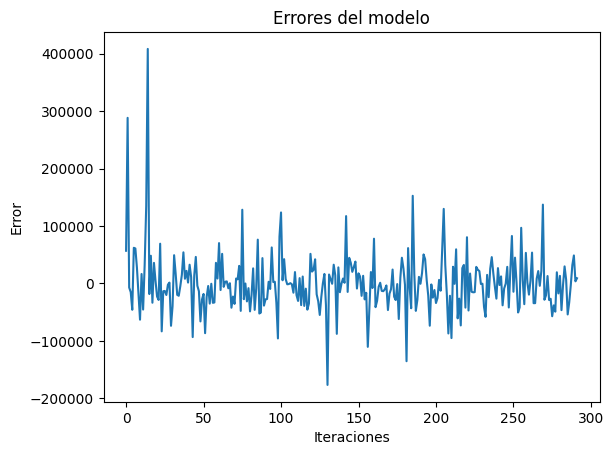

In [72]:
modelo.graficar_error(errores)

In [73]:
y_estimada, error_total, errores = modelo.estimar_modelo(vector_x_test, vector_y_test, betas_scikit_m1)
error_total

1315091304.4743197

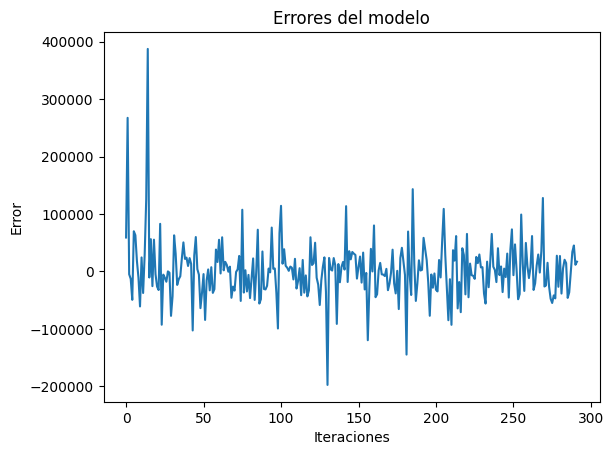

In [74]:
modelo.graficar_error(errores)

#### Modelo 1stFlrSF Manual vs Scikit

In [48]:
vector_x_test, vector_y_test = modelo.get_testing_arrays('1stFlrSF')

In [51]:
y_estimada, error_total, errores = modelo.estimar_modelo(vector_x_test, vector_y_test, betas_manual_m2)
error_total

2436825306.13139

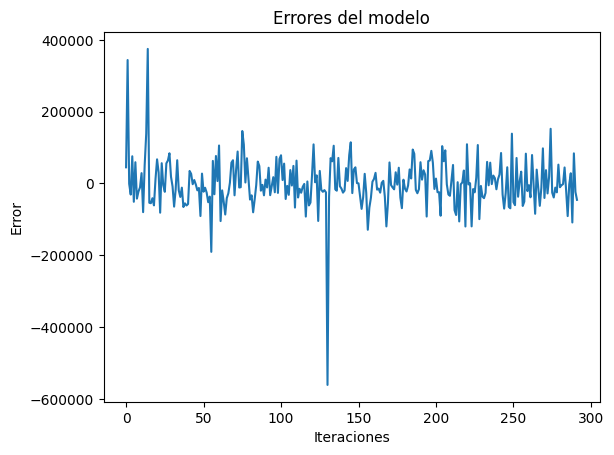

In [52]:
modelo.graficar_error(errores)

In [53]:
y_estimada, error_total, errores = modelo.estimar_modelo(vector_x_test, vector_y_test, betas_scikit_m2)
error_total

2292769137.345937

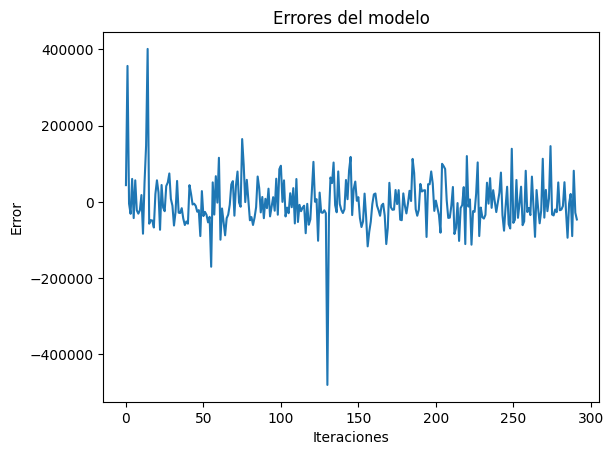

In [54]:
modelo.graficar_error(errores)

### Conclusiones

El error más bajo lo determinó la variable OverallQual, específicamente el modelo entrenado con ScikitLearn, el error total de este modelo fue de: 1315091304, mientras que el del entrenamiento manual fue de: 1347229151.

La variable 1stFlrSF presentó para ambos modelos un error mucho mas grande